<a href="https://colab.research.google.com/github/bob8dod/ML-studying/blob/main/ML_DL/19_DL_Model_(RNN_LSTM_with_CNN_Conv1D%2CMaxPooling1D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb #load imdb dataset 
from tensorflow.keras.preprocessing.sequence import pad_sequences #for same length of text
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Activation, Conv1D, MaxPooling1D # RNN/NN/CNN

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
(X_train, Y_train),(X_test, Y_test) = imdb.load_data(num_words=5000) #Bring 5000 words only (by Descending to frequency)
print(X_train.shape[0]) 
print(X_test.shape[0])
print(np.max(Y_train))

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000
25000
1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
#Data preprocessing
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)
# Y is binary_classification, so we don't need to do One-Hot encoding

In [ ]:
#Model setting
model = Sequential()
model.add(Embedding(5000,100)) #(kind of words, nodes)
model.add(Dropout(0.5)) 
model.add(Conv1D(64,3,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55, activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
#Embedding -> CNN -> RNN -> NN

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          19264     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
Total params: 545,720
Trainable params: 545,720
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=5, batch_size=100, validation_data=(X_test,Y_test))
print('\nAccuarcy: %.4f' %(model.evaluate(X_test,Y_test)[1]))

Epoch 1/5
250/250 [==============================] - 6s 18ms/step - loss: 0.5680 - accuracy: 0.6679 - val_loss: 0.3824 - val_accuracy: 0.8306
Epoch 2/5
250/250 [==============================] - 4s 15ms/step - loss: 0.3056 - accuracy: 0.8732 - val_loss: 0.3628 - val_accuracy: 0.8410
Epoch 3/5
250/250 [==============================] - 4s 15ms/step - loss: 0.2669 - accuracy: 0.8905 - val_loss: 0.3582 - val_accuracy: 0.8437
Epoch 4/5
250/250 [==============================] - 4s 15ms/step - loss: 0.2236 - accuracy: 0.9127 - val_loss: 0.3655 - val_accuracy: 0.8375
Epoch 5/5
782/782 [==============================] - 3s 3ms/step - loss: 0.3722 - accuracy: 0.8434

Accuarcy: 0.8434


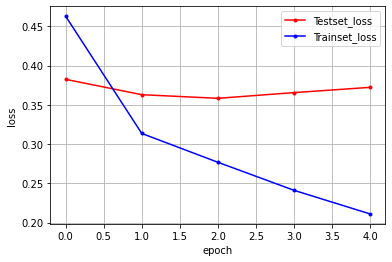

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label = 'Trainset_loss')
plt.legend(loc="upper right")
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()